In [100]:
!pip install torchviz

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [1]:
import numpy as np
import torch
from torchviz import make_dot

In [2]:
true_b = 1
true_w = 2
N = 100
np.random.seed(42)

In [3]:
"""Data Generation"""
X = np.random.randn(N,1)
epsilon = (.1 * np.random.randn(N,1))
y = true_b + true_w * X + epsilon

In [4]:
"""Shuffle and Indices"""
idx = np.arange(N)
np.random.shuffle(idx)

In [5]:
"""Use first 80 indexes for training"""
train_idx = idx[:int(N* 0.8)]
"""Use remaning indexes for validation"""
val_idx = idx[int(N*0.8):]

In [6]:
"""Generate traning and validation sets"""
X_train,y_train,X_val,y_val = X[train_idx],y[train_idx],X[val_idx],y[val_idx]
X_train[0][0]

-0.3276621465977682

In [7]:
"""Generate tensors from numpy array"""
X_train_tensor = torch.as_tensor(X_train).float()
X_train_tensor[0][0]

tensor(-0.3277)

In [8]:
"""Configure device"""
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cpu'

In [9]:
"""Generat GPU tensor"""
X_train_tensor = torch.as_tensor(X_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [10]:
"""Back to Numpy"""
back_to_numpy = X_train_tensor.numpy()
back_to_numpy[0][0]

-0.32766214

In [11]:
"""First Step"""
torch.manual_seed(42)
b = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)
w = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)
print(b,w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [12]:
yhat =  w * X_train_tensor + b
error = (yhat - y_train_tensor)
loss = (error**2).mean()
loss

tensor(3.0535, grad_fn=<MeanBackward0>)

In [13]:
loss.backward()

In [14]:
"""Actual values of the grad"""
print(b.grad)
print(w.grad)

tensor([-1.1663])
tensor([-2.8676])


In [15]:
"""Updatint the weights and bias"""
b.grad.zero_(), w.grad.zero_()

(tensor([0.]), tensor([0.]))

In [18]:
from torchviz import make_dot
# Set the learning rate 
lr = 0.1

# Step 0: Initialize weights and balances
torch.manual_seed(42)
b = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)
w = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)

# Define the number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model's predicted output 
    yhat = w * X_train_tensor + b
    
    # Step 2 - Compute error and loss
    error = (yhat - y_train_tensor)
    loss = (error **2).mean()
    
    #Step 3 - Compute gradients for both w and b
    loss.backward()
    
    #Step 4 - Update the gradients 
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
        b.grad.zero_()
        w.grad.zero_()

print(b,w)    

tensor([0.9958], requires_grad=True) tensor([1.9852], requires_grad=True)


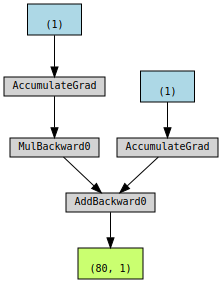

In [19]:
# Set the learning rate 
lr = 0.1

# Step 0: Initialize weights and balances
torch.manual_seed(42)
b = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)
w = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)

# Step 1 - Compute model's predicted output 
yhat = w * X_train_tensor + b
    
# Step 2 - Compute error and loss
error = (yhat - y_train_tensor)
loss = (error **2).mean()

make_dot(yhat)

In [25]:
"""Using optimizer SGD"""

"""Using pytorch actual MSELoss"""

# Set the learning rate 
lr = 0.1

# Step 0: Initialize weights and balances
torch.manual_seed(42)
b = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)
w = torch.randn(1,dtype=torch.float32,requires_grad=True,device=device)

# Define the optmizer 
optimizer = torch.optim.SGD([w,b],lr=lr)

# Define the number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Compute model's predicted output 
    yhat = w * X_train_tensor + b
    
    # Step 2 - Compute error and loss
    #error = (yhat - y_train_tensor)
    #loss = (error **2).mean()
    loss_fun = torch.nn.MSELoss(reduction='mean')
    loss = loss_fun(yhat,y_train_tensor)
    
    #Step 3 - Compute gradients for both w and b
    loss.backward()
    
    #Step 4 - Update the gradients 
    optimizer.step()
    
    #Step 5 - Setting graidents to zero
    optimizer.zero_grad()
    
print(b.detach().numpy(),w.detach().numpy(),loss.detach().numpy())

[0.9957802] [1.9851683] 0.0075665177


In [39]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [27]:
"""Using item() and tolist() on loss function"""
print(loss.item(),loss.tolist())

0.007566517684608698 0.007566517684608698


In [43]:
"""Implementing the model class """

class ManualLinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.b = torch.nn.Parameter(torch.randn(1,dtype=torch.float32,requires_grad=True))
        self.w = torch.nn.Parameter(torch.randn(1,dtype=torch.float32,requires_grad=True))
        
    def forward(self,X):
        # Compute the predictions
        return self.w * X + self.b

In [44]:
torch.manual_seed(42)
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [45]:
"""Getting the current value of all the parameters"""
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [47]:
"""Implementing complete training loop with model class"""

# Learning Rate 
lr = 0.1

#Step 0 - Define the weights and bias
torch.manual_seed(42)
model = ManualLinearRegression().to(device)

optimizer = torch.optim.SGD(model.parameters(),lr=lr)
loss_fun = torch.nn.MSELoss(reduction='mean')

# Defint the number of epoch
n_epochs = 1000

for epochs in range(n_epochs):
    model.train()  # Put the model in training mode
    
    # Step1 - Forward pass/make predictions
    yhat = model(X_train_tensor)
    
    # Step2 - Compute loss 
    loss = loss_fun(yhat,y_train_tensor)
    
    # Step3 - Compute the backward pass
    loss.backward()
    
    # Step4 - Update the weights and bias 
    optimizer.step()
    
    #Step 5 - Set the weights and bias to zero
    optimizer.zero_grad()
    
    
print(model.state_dict())
    



OrderedDict([('b', tensor([0.9958])), ('w', tensor([1.9852]))])


In [48]:
"""Linear Model"""
linear = torch.nn.Linear(1,1)
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]])), ('bias', tensor([0.2018]))])

In [52]:
""" Making using Linear Model"""
class MyLinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1) # in_feature =1 , out_feature =1, bias = True
        
    def forward(self,X):
        return self.Linear(X)

In [53]:
torch.manual_seed(42)
dummy1 = MyLinearRegressionModel()
list(dummy1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [54]:
""" Building lienar model with 3 inputs and 1 outputs with 5 hidden"""
torch.manual_seed(42)
model = torch.nn.Sequential(
        torch.nn.Linear(3,5),
        torch.nn.Linear(5,1)
).to(device)


In [55]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]])),
             ('0.bias', tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472])),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]])),
             ('1.bias', tensor([-0.2062]))])

In [56]:
"""Using add_module() to rename the layers"""
torch.manual_seed(42)
model = torch.nn.Sequential()
model.add_module('Input_Layer', torch.nn.Linear(3,5))
model.add_module('Output_Layer', torch.nn.Linear(5,1))
model.to(device)

Sequential(
  (Input_Layer): Linear(in_features=3, out_features=5, bias=True)
  (Output_Layer): Linear(in_features=5, out_features=1, bias=True)
)

### Putting all together
* Data Preparation
* Model Configuration
* Model Training

In [67]:
%%writefile data_preparation/v0.py

"""Data Preparation"""
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train_tensor = torch.as_tensor(X_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Writing data_preparation/v0.py


In [69]:
%run -i data_preparation/v0.py

In [74]:
%%writefile model_configuration/v0.py

torch.manual_seed(42)
# Learning rate 
lr = 0.1

# Model 
model = torch.nn.Sequential(torch.nn.Linear(1,1)).to(device)

# Optimizer 
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

# Loss 
loss_fun = torch.nn.MSELoss(reduction='mean')


Overwriting model_configuration/v0.py


In [75]:
%run -i model_configuration/v0.py

In [78]:
%%writefile model_training/v0.py

# Define the epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train() # put model in training mode
    
    #Step 1 - Forward pass/make predictions
    yhat = model(X_train_tensor)
    
    #Step 2 - Calcuate the loss
    loss = loss_fun(yhat,y_train_tensor)
    
    #Step 3 - Calculate the gradient 
    loss.backward()
    
    #Sep 4 - Update the parameters
    optimizer.step()
    
    #Step 5 - Set gradient to zero 
    optimizer.zero_grad()

Overwriting model_training/v0.py


In [79]:
%run -i model_training/v0.py

In [80]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9852]])), ('0.bias', tensor([0.9958]))])
